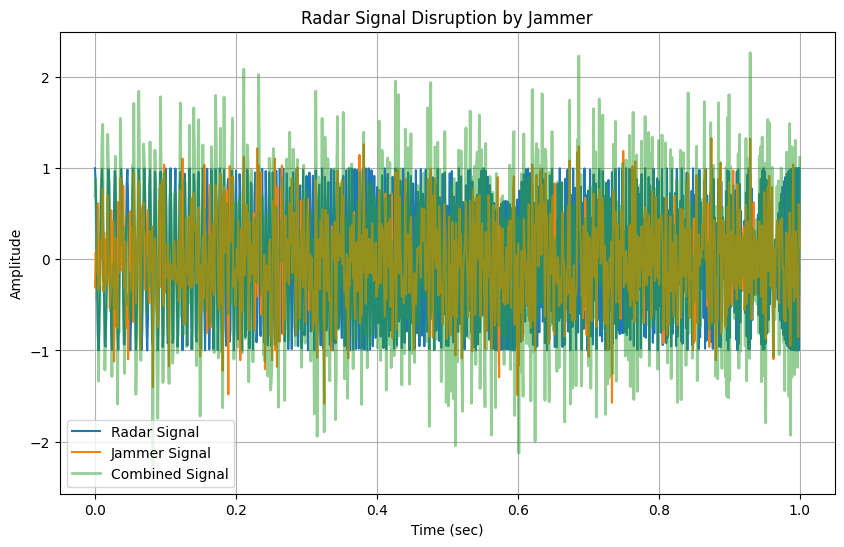

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

t = np.linspace(0, 1, 1000)

radar_signal = chirp(t,f0=100, f1=500, t1=1, method="linear")

jammer = np.random.normal(0, 0.5, len(t))

combined = radar_signal + jammer

plt.figure(figsize=(10,6))
plt.plot(t, radar_signal, label="Radar Signal")
plt.plot(t, jammer, label="Jammer Signal", alpha=1)
plt.plot(t, combined, label="Combined Signal", linewidth=2, alpha=0.5)
plt.legend()
plt.title("Radar Signal Disruption by Jammer")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)


plt.show()

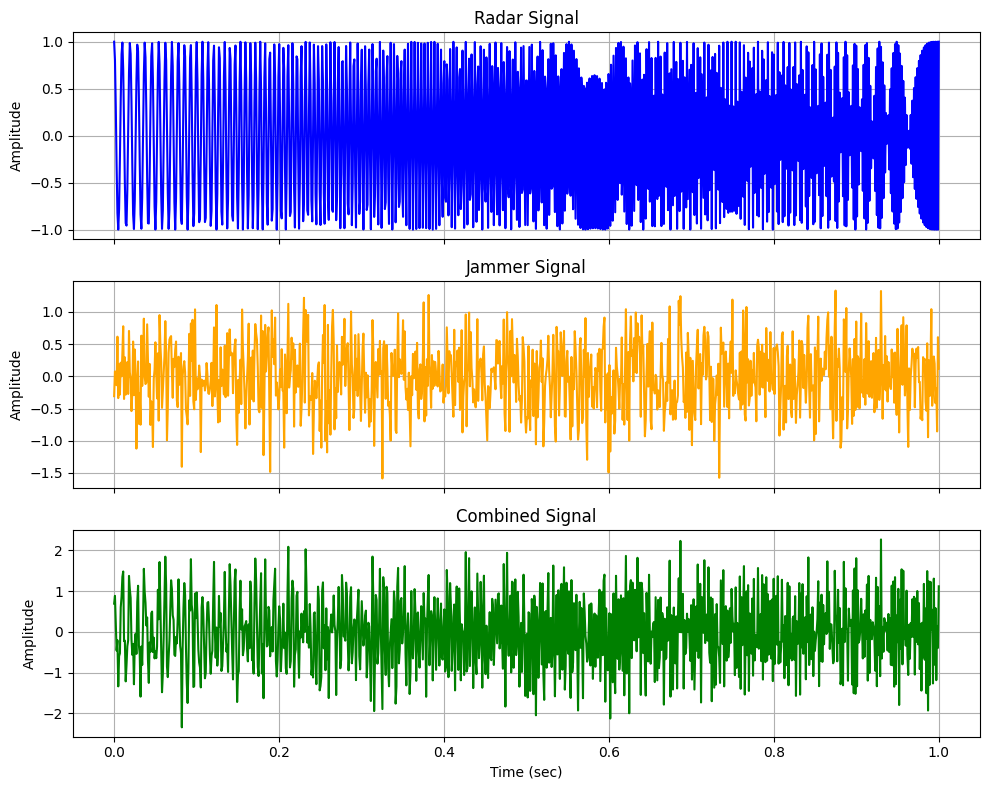

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axs[0].plot(t, radar_signal, color='blue')
axs[0].set_title("Radar Signal")

axs[1].plot(t, jammer, color='orange')
axs[1].set_title("Jammer Signal")

axs[2].plot(t, combined, color='green')
axs[2].set_title("Combined Signal")

for ax in axs:
    ax.grid(True)
    ax.set_ylabel("Amplitude")

plt.xlabel("Time (sec)")
plt.tight_layout()
plt.show()

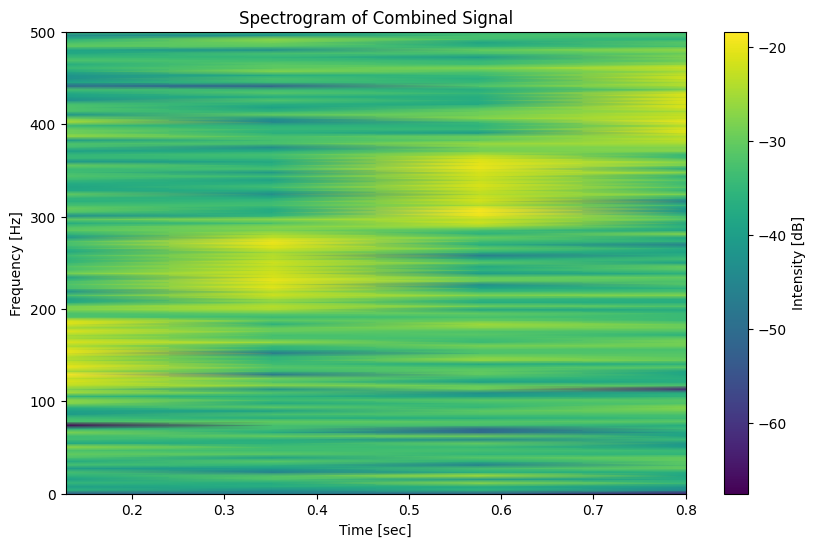

In [12]:
from scipy.signal import spectrogram

f, t_spec, Sxx = spectrogram(combined, fs=1000)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t_spec, f, 10*np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram of Combined Signal')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()